In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
try:
    df = pd.read_csv("data/insurance.csv")
except:
    df = pd.read_csv("https://raw.githubusercontent.com/ysntrkc/ai-summer-camp-proje-1/main/data/insurance.csv?token=GHSAT0AAAAAABWZWGRVHO76I7S3ZQSMCHSKYYAYSNQ")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Veri Ön İşleme Yapılması

In [5]:
# One Hot Encoding metodu ile kategorik verileri özel kolonlara dönüştürüyoruz.
ohe_cols = ["sex", "smoker", "region"]
df = pd.get_dummies(df, columns=ohe_cols)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [6]:
# Feturelar ve Targetı X ve y olarak ayırıyoruz.
y = df[["charges"]]
X = df.drop(columns=["charges"])

In [7]:
# train_test_split ile train ve test verilerini ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# scale yapacağımız sütunları belirledik ve normalize ediyoruz.
scale_cols = ["age", "bmi", "children"]
scaler = MinMaxScaler()
train = scaler.fit_transform(X_train[scale_cols])
test = scaler.transform(X_test[scale_cols])
X_train[scale_cols] = train
X_test[scale_cols] = test

In [9]:
x = scaler.fit_transform(X[scale_cols])
X[scale_cols] = x

## Model Seçme
Bu kısımda 5 farklı regresyon algoritması seçtik ve bu algoritmaların performanslarını ölçtük.
* Bu algoritmalar xgboost, linear regression, random forest, k-nearest neighbors, ve lightgbmdir.

#### Modellerin Düz Halleri İle Performanslarının Ölçülmesi

In [10]:
xgb = XGBRegressor(objective="reg:squarederror")
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"XGBRegressor \nR2 Score: {xgb_r2} \nRMSE: {xgb_rmse}")

XGBRegressor 
R2 Score: 0.8208627272043386 
RMSE: 5125.024745472466


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr_r2 = r2_score(y_test, pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"LinearRegressor \nR2 Score: {lr_r2} \nRMSE: {lr_rmse}")

LinearRegressor 
R2 Score: 0.7696118054369011 
RMSE: 5812.100272258871


In [12]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
pred = rfr.predict(X_test)
rfr_r2 = r2_score(y_test, pred)
rfr_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"RandomForestRegressor \nR2 Score: {rfr_r2} \nRMSE: {rfr_rmse}")

RandomForestRegressor 
R2 Score: 0.8511603460518066 
RMSE: 4671.564111446518


In [13]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
knn_r2 = r2_score(y_test, pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"KNeighborsRegressor \nR2 Score: {knn_r2} \nRMSE: {knn_rmse}")

KNeighborsRegressor 
R2 Score: 0.7786539147491962 
RMSE: 5696.904120219449


In [14]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
lgbm_r2 = r2_score(y_test, pred)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, pred))
print(f"LGBMRegressor \nR2 Score: {lgbm_r2} \nRMSE: {lgbm_rmse}")

LGBMRegressor 
R2 Score: 0.8555977221914436 
RMSE: 4601.400226237108


In [15]:
r2_scores = {"XGBRegressor": xgb_r2, "LinearRegressor": lr_r2, "RandomForestRegressor": rfr_r2, "KNeighborsRegressor": knn_r2, "LGBMRegressor": lgbm_r2}
rmse_scores = {"XGBRegressor": xgb_rmse, "LinearRegressor": lr_rmse, "RandomForestRegressor": rfr_rmse, "KNeighborsRegressor": knn_rmse, "LGBMRegressor": lgbm_rmse}

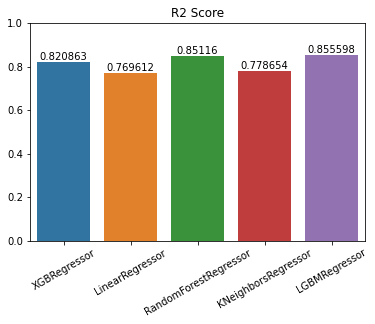

In [16]:
ax = sns.barplot(x=list(r2_scores.keys()), y=list(r2_scores.values()))
ax.bar_label(ax.containers[0])
plt.xticks(rotation=30)
plt.title("R2 Score")
plt.ylim((0, 1))
plt.show()

#### Modellerin Cross Validation İle Performanslarının Ölçülmesi

In [17]:
score_xgb = cross_val_score(xgb, X, y, cv=5).mean()
score_lr = cross_val_score(lr, X, y, cv=5).mean()
score_rfr = cross_val_score(rfr, X, y.values.ravel(), cv=5).mean()
score_knn = cross_val_score(knn, X, y, cv=5).mean()
score_lgbm = cross_val_score(lgbm, X, y, cv=5).mean()

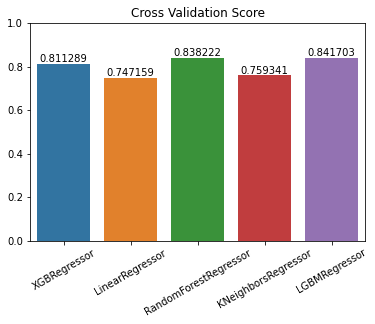

In [18]:
cv_scores = {"XGBRegressor": score_xgb, "LinearRegressor": score_lr, "RandomForestRegressor": score_rfr, "KNeighborsRegressor": score_knn, "LGBMRegressor": score_lgbm}
ax = sns.barplot(x=list(cv_scores.keys()), y=list(cv_scores.values()))
ax.bar_label(ax.containers[0])
plt.title("Cross Validation Score")
plt.xticks(rotation=30)
plt.ylim((0, 1))
plt.show()

## Hiper-parametre Optimizasyonu
Google Colab'de yaptığımız ilk denemelerde XGBoost daha iyi performans verdiği için bu algoritmayı kullanıyoruz.

In [19]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.02], #so called `eta` value
              'max_depth': [3],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [275],
              'reg_alpha': [1.15],
              'reg_lambda': [1.35],}
xgb_grid = GridSearchCV(xgb, 
                        param_grid=parameters,
                        cv=3,
                        n_jobs=5,
                        verbose=True)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
     

In [20]:
print(xgb_grid.best_score_)

0.8495952149287026


In [21]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.02,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 275,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'reg_alpha': 1.15,
 'reg_lambda': 1.35,
 'subsample': 0.7}

In [22]:
pred = xgb_grid.predict(X_test)
print(f"XGBRegressor \nR2 Score: {r2_score(y_test, pred)} \nRMSE: {(mean_squared_error(y_test, pred)) ** 0.5}")

XGBRegressor 
R2 Score: 0.8731460137786737 
RMSE: 4312.757578778684


In [23]:
# Evaluation Metrics
print(f"""
    XGBRegressor
    R2 Score: {r2_score(y_test, pred)}
    MSE: {mean_squared_error(y_test, pred)}
    RMSE: {(mean_squared_error(y_test, pred)) ** 0.5}
    MAE: {mean_absolute_error(y_test, pred)}
    RMAE: {(mean_absolute_error(y_test, pred)) ** 0.5}
    MSLE: {mean_squared_log_error(y_test, pred)}
    RMSLE: {(mean_squared_log_error(y_test, pred)) ** 0.5}
""")


    XGBRegressor
    R2 Score: 0.8731460137786737
    MSE: 18599877.93331297
    RMSE: 4312.757578778684
    MAE: 2421.712807287916
    RMAE: 49.21090130538066
    MSLE: 0.17061437748329528
    RMSLE: 0.41305493276717475

